In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
data=pd.read_csv("C:/Users/Yunsun2/Desktop/Github/loan_data.csv") #set the first col as index: index_col=0
data=pd.get_dummies(data, columns=['purpose'], drop_first=True)

#train-test split;
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rs=8765
X=data.drop('not.fully.paid', axis=1)
Y=data['not.fully.paid']
x_train, x_test, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=rs) 

std_scale = preprocessing.StandardScaler().fit(x_train)
xtrain = std_scale.transform(x_train)
xtest  = std_scale.transform(x_test)  

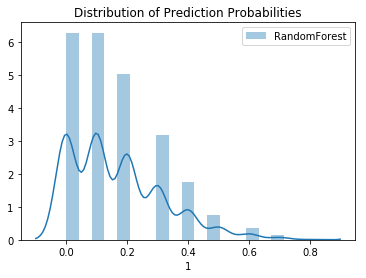

RandomForest predictions with default hyparameters for Test

Accuracy
0.8208072373
             precision    recall  f1-score   support

          0       0.83      0.98      0.90      2386
          1       0.28      0.03      0.06       488

avg / total       0.74      0.82      0.76      2874



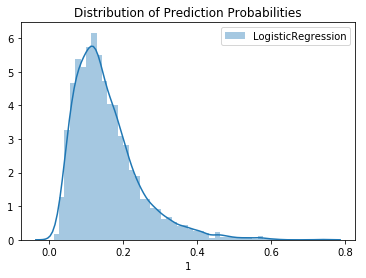

LogisticRegression predictions with default hyparameters for Test

Accuracy
0.830201809325
             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2386
          1       0.50      0.02      0.04       488

avg / total       0.78      0.83      0.76      2874



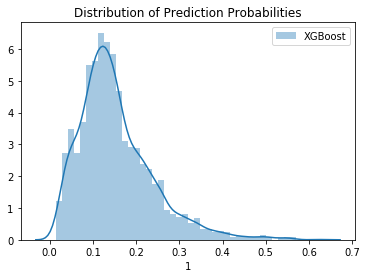

XGBoost predictions with default hyparameters for Test

Accuracy
0.830549756437
             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2386
          1       0.54      0.01      0.03       488

avg / total       0.78      0.83      0.76      2874

The graph showws, Logistic and XGBoost predict with more confidence (more confirmative predictive probabilities) than RandomForest.


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

result=pd.DataFrame()
def classifier(classifier, cname, rs): 
    model=classifier
    global result

    model.fit(xtrain, ytrain)
    pred=model.predict(xtest)
    tpred=model.predict(xtrain)
    
    predproba=pd.DataFrame(model.predict_proba(xtest))
    tpredproba=pd.DataFrame(model.predict_proba(xtrain))
    
    sns.distplot(predproba[1], label=str(cname))  
    plt.title("Distribution of Prediction Probabilities") 
    plt.legend()
    plt.show() ###     
    
    print(cname + ' predictions with default hyparameters for Test'+'\n')
    print('Accuracy')
    print(accuracy_score(ytest, pred, normalize=True))
    print(classification_report(ytest, pred))  
    
    #compare bad predictions of different models; 
    result=pd.concat([result, pd.DataFrame(pred)], axis=1) #to merge the predicted labels back to the dataset;
    result.rename(columns={0:str(cname + '_pred')}, inplace=True)
    
classifier(RandomForestClassifier(random_state=rs), 'RandomForest', 300)
classifier(LogisticRegression(random_state=rs), 'LogisticRegression', 300)
classifier(XGBClassifier(random_state=rs), 'XGBoost', 300)    

print('The graph showws, Logistic and XGBoost predict with more confidence (more confirmative predictive probabilities) than RandomForest.')

#d.f. for comparison; 
comp=pd.concat([pd.DataFrame(ytest), x_test], axis=1)
comp=comp.reset_index()
comp=pd.concat([comp, result], axis=1)


In [223]:
a=comp[(comp['not.fully.paid'] != comp['XGBoost_pred']) & (comp['XGBoost_pred']==comp['LogisticRegression_pred'])
      & (comp['RandomForest_pred']==comp['LogisticRegression_pred'])]

print(len(a))
print('\n')
b=a.groupby(['not.fully.paid', 'XGBoost_pred', 'RandomForest_pred'])['LogisticRegression_pred'].value_counts()
print(b)
print('\n')
c=ytest.value_counts()
print(c)
print('\n')
print('Conclusions:')
print("Out of all 488 'not.full.paid.' data in test, 461 of which are consistently predicted to be 'fully.paid' by all 3 models.")
print('This is the only case that, 3 models unanimously disagree with the ground truth in the results.')
print("It is the main stumbling block for the models' prediction performance.")
print("Next steps to be: check the data of these labels' ground truth; generate more robust features if labels are correct.")

461


not.fully.paid  XGBoost_pred  RandomForest_pred  LogisticRegression_pred
1               0             0                  0                          461
Name: LogisticRegression_pred, dtype: int64


0    2386
1     488
Name: not.fully.paid, dtype: int64


Conclusions:
Out of all 488 'not.full.paid.' data in test, 461 of which are consistently predicted to be 'fully.paid' by all 3 models.
This is the main stumbling block for the models' prediction performance.
Next steps to be: check the data of these labels' ground truth; generate more robust features if labels are correct.


In [221]:
'''
a=pd.DataFrame(ytest)
result['not.fully.paid'] = a.reset_index()['not.fully.paid']
result.tail()
'''

"\na=pd.DataFrame(ytest)\nresult['not.fully.paid'] = a.reset_index()['not.fully.paid']\nresult.tail()\n"